In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
data = pd.read_csv("C:\\Users\\PAWAN\\Downloads\\train.csv")
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [10]:
data.shape

(1000, 12)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [13]:
data.isnull().sum()

v.id             0
on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
dtype: int64

In [15]:
data.columns

Index(['v.id', 'on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price'],
      dtype='object')

In [17]:
pair_plot = data[['years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']].corr()

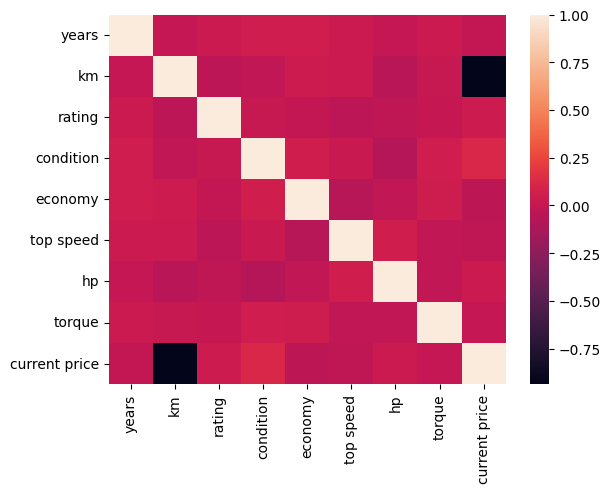

In [19]:
sns.heatmap(pair_plot)
plt.show()

In [20]:
tensor_data = tf.constant(data, dtype= tf.dtypes.float64)
tensor_data = tf.random.shuffle(tensor_data)

In [23]:
print(tensor_data)

tf.Tensor(
[[4.890000e+02 6.643150e+05 8.107300e+05 ... 8.700000e+01 8.700000e+01
  2.259170e+05]
 [8.660000e+02 6.529220e+05 8.411930e+05 ... 5.600000e+01 1.290000e+02
  2.870935e+05]
 [2.050000e+02 5.236370e+05 8.160840e+05 ... 8.600000e+01 8.200000e+01
  1.589515e+05]
 ...
 [5.530000e+02 6.704880e+05 8.311100e+05 ... 6.200000e+01 8.300000e+01
  2.789935e+05]
 [6.430000e+02 5.038560e+05 7.687570e+05 ... 8.300000e+01 1.020000e+02
  3.274545e+05]
 [3.220000e+02 6.075750e+05 8.129660e+05 ... 1.190000e+02 1.060000e+02
  1.928535e+05]], shape=(1000, 12), dtype=float64)


In [21]:
y=tensor_data[:-1:]
x=tensor_data[:,3:-1]

In [27]:
train_size = len(data) * 0.8
test_size = len(data) * 0.1
val_size = len(data) * 0.1

train_size,test_size,val_size

(800.0, 100.0, 100.0)

In [38]:
x_train = tensor_data[:int(train_size)]
x_test=tensor_data[int(train_size):int(train_size)+int(test_size)]
x_val = tensor_data[int(train_size) + int(test_size):]


len(x_train), len(x_test), len(x_val)

(800, 100, 100)

In [41]:
from tensorflow.keras.layers import Normalization

normalizer = Normalization(input_shape=(8,))

c:\Users\PAWAN\anaconda3\envs\project\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
normalizer.adapt(x)


In [47]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer

In [49]:
model= Sequential([
    
    InputLayer(input_shape=(8,)),
    Dense(64),
    Dense(32),
    Dense(16),
    Dense(1)
    
])

c:\Users\PAWAN\anaconda3\envs\project\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
tf.keras.utils.plot_model(model, to_file="model.png",show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.
